In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline % 

In [22]:
df = pd.read_csv('./HeightWeight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [16]:
df.shape

(25000, 3)

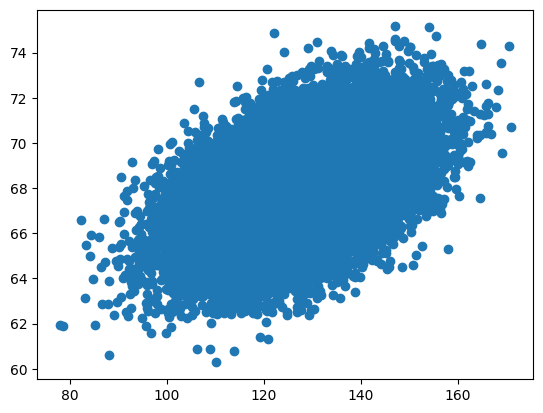

In [17]:
## Scatter plot
plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])

In [23]:
df.drop(columns='Index',inplace=True)


In [24]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [25]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [26]:
# Seaborn for visualization
import seaborn as sns


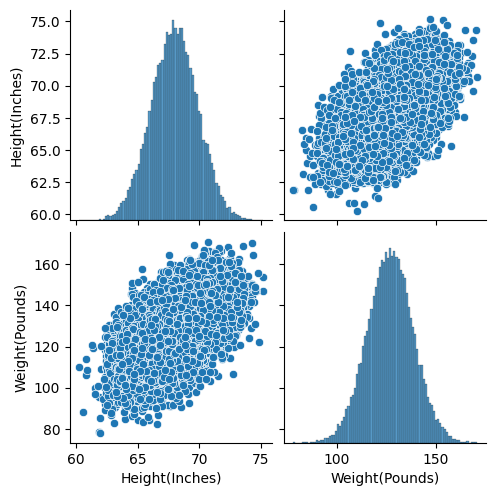

In [28]:
sns.pairplot(df)

In [30]:
## Split the data in dependent and independent form
X = df[['Weight(Pounds)']]
Y = df['Height(Inches)']

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into independent (X) and dependent (Y) variables
X = df[['Weight(Pounds)']]
Y = df['Height(Inches)']

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the shapes of the split data
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((20000, 1), (5000, 1), (20000,), (5000,))

In [37]:
### Method of doing standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
X_train,X_test

(array([[-1.4101645 ],
        [-0.00612483],
        [ 1.1306089 ],
        ...,
        [-0.52416228],
        [ 0.7366219 ],
        [-0.36927544]]),
 array([[ 0.61959496],
        [-1.29909507],
        [ 0.76587649],
        ...,
        [ 1.212802  ],
        [ 0.21044337],
        [ 0.65975876]]))

In [39]:
### Now we are going to apply simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

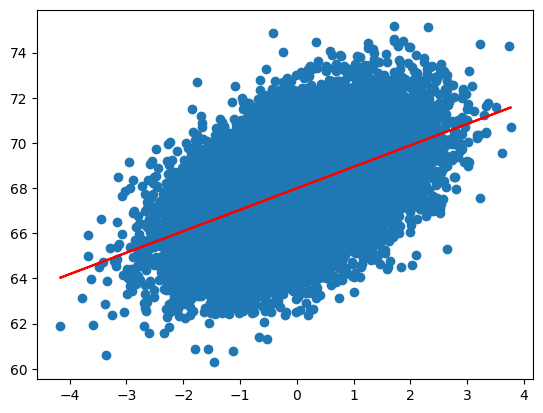

In [41]:
## Plot training data and best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train),c='red')

In [42]:
y_pred = regression.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rsme = np.sqrt(mse)
mse,mae,rsme

(2.724962846065037, 1.316304056930067, 1.6507461482811452)

In [45]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)

In [46]:
score

0.26055631630450127

In [47]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Collecting statsmodels
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/59/9a/e466a1b887a1441141e52dbcc98152f013d85076576da6eed2357f2016ae/statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 495.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.8 MB 787.7 kB/s eta 0:00:13
    --------------------------------------- 0.1/9.8 MB 950.9 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.8 MB 1.2 MB/s eta 0:00:08
   - ------------------------------------

In [48]:
## OLA linear regression
import statsmodels.api as sm
model= sm.OLS(Y_train,X_train).fit()

In [49]:
model.predict(X_train)

array([-1.33996836, -0.00581994,  1.07432867, ..., -0.49807017,
        0.69995383, -0.35089339])

In [54]:
regression.predict(scaler.transform(([[173]])))

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([71.74159698])